In [30]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
#LSTM for stock prediction
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [32]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import yfinance as yf

In [34]:
import datetime

In [35]:
enddate=datetime.date.today()
enddate


datetime.date(2023, 3, 27)

In [36]:
info = yf.download(tickers="RELIANCE.NS", start="2013-01-01", end=enddate)

[*********************100%***********************]  1 of 1 completed


In [37]:
info

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,418.037415,419.325226,415.610443,416.402924,387.885132,3152667
2013-01-02,418.037415,423.981079,417.319244,419.993866,391.230133,6203434
2013-01-03,420.315826,426.952911,418.334595,426.333771,397.135834,7968629
2013-01-04,426.903381,428.240692,422.767578,426.878632,397.643402,6140890
2013-01-07,428.785553,431.410645,421.900787,424.278259,395.221130,7064261
...,...,...,...,...,...,...
2023-03-20,2215.000000,2220.000000,2180.000000,2201.250000,2201.250000,9010595
2023-03-21,2218.949951,2274.000000,2217.000000,2269.699951,2269.699951,9876263
2023-03-22,2285.000000,2291.449951,2270.000000,2276.600098,2276.600098,5039622


In [38]:
info.shape

(2526, 6)

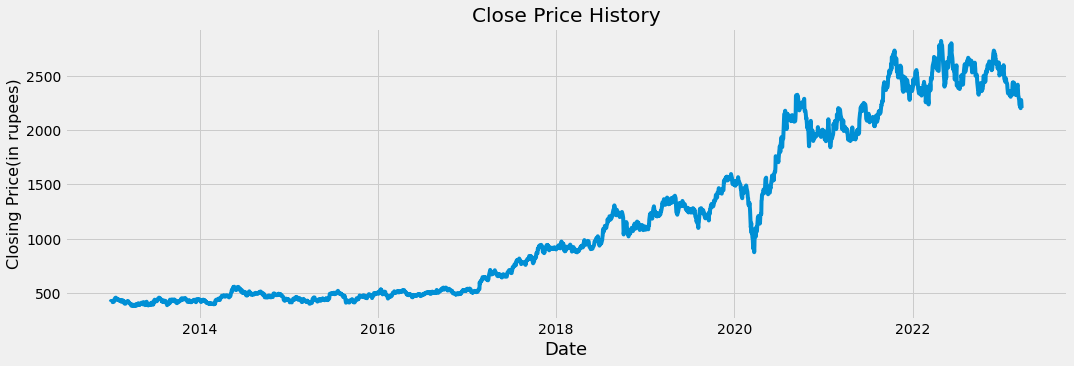

In [39]:
plt.figure(figsize=(16,5))
plt.title('Close Price History')
plt.plot(info['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price(in rupees)', fontsize=16)
plt.show()

In [40]:
# new dataframe with close price option
data = info.filter(['Close'])
#dataframe into numpy array
dataset = data.values

training_data_len=math.ceil(len(dataset) * .8)

training_data_len


2021

In [41]:
# train_size = int(len(data) * 0.8)
# train_data = data[:train_size]
# test_data = data[train_size:]

# # Create a validation set from the training set
# val_size = int(len(train_data) * 0.2)
# val_data = train_data[:val_size]
# train_data = train_data[val_size:]

# # Normalize the data within each sequence
# scaler = MinMaxScaler()
# train_data = scaler.fit_transform(train_data)
# val_data = scaler.transform(val_data)
# test_data = scaler.transform(test_data)

In [42]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01485096],
       [0.01632285],
       [0.01892151],
       ...,
       [0.77732724],
       [0.76552239],
       [0.74728228]])

In [43]:
# scaled training data set
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()



[array([0.01485096, 0.01632285, 0.01892151, 0.01914485, 0.01807898,
       0.01687101, 0.01728721, 0.0167492 , 0.01468854, 0.01624164,
       0.01616043, 0.01904332, 0.02485987, 0.02693068, 0.03094033,
       0.03096063, 0.0315697 , 0.03004705, 0.02936693, 0.02639268,
       0.02340828, 0.02676827, 0.02417975, 0.02567195, 0.0241899 ,
       0.02176381, 0.02194653, 0.02138822, 0.01948998, 0.02047463,
       0.02190593, 0.02262665, 0.01796733, 0.01588637, 0.0162315 ,
       0.01641421, 0.02177396, 0.01860684, 0.0192971 , 0.01762218,
       0.011359  , 0.01294256, 0.00939985, 0.00869943, 0.00914607,
       0.01193761, 0.01374449, 0.01399827, 0.01700297, 0.01562243,
       0.01630255, 0.01572394, 0.0187794 , 0.01544987, 0.01355163,
       0.01166353, 0.01119659, 0.00914607, 0.00874003, 0.00846595])]
[0.003207719742393228]

[array([0.01485096, 0.01632285, 0.01892151, 0.01914485, 0.01807898,
       0.01687101, 0.01728721, 0.0167492 , 0.01468854, 0.01624164,
       0.01616043, 0.01904332, 0.0

In [44]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [45]:
x_train.shape

(1961, 60)

In [46]:
y_train.shape


(1961,)

In [47]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1961, 60, 1)

In [48]:
#LSTM model
# 
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [49]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [50]:
model.fit(x_train, y_train, batch_size=16, epochs=25)
# model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), batch_size=32)


Epoch 1/25
123/123 [==============================] - 23s 141ms/step - loss: 0.0024
Epoch 2/25
123/123 [==============================] - 14s 116ms/step - loss: 3.7987e-04
Epoch 3/25
123/123 [==============================] - 10s 82ms/step - loss: 3.6268e-04
Epoch 4/25
123/123 [==============================] - 9s 75ms/step - loss: 3.4882e-04
Epoch 5/25
123/123 [==============================] - 10s 80ms/step - loss: 2.7424e-04
Epoch 6/25
123/123 [==============================] - 10s 84ms/step - loss: 2.8787e-04
Epoch 7/25
123/123 [==============================] - 10s 82ms/step - loss: 2.5499e-04
Epoch 8/25
123/123 [==============================] - 9s 73ms/step - loss: 3.6464e-04
Epoch 9/25
123/123 [==============================] - 10s 83ms/step - loss: 2.2258e-04
Epoch 10/25
123/123 [==============================] - 10s 82ms/step - loss: 2.1016e-04
Epoch 11/25
123/123 [==============================] - 10s 83ms/step - loss: 2.8075e-04
Epoch 12/25
123/123 [========================

In [51]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [52]:
#data to numoy array
x_test = np.array(x_test)
x_test.shape

(505, 60)

In [53]:
#reshape
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [54]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

16/16 [==============================] - 1s 30ms/step


array([[2154.6824],
       [2121.119 ],
       [2113.0642],
       [2077.7441],
       [2029.4349],
       [2083.816 ],
       [2089.1558],
       [2101.0637],
       [2066.234 ],
       [2006.3146],
       [1998.9097],
       [2038.0161],
       [2028.9897],
       [2034.6766],
       [2011.7101],
       [1996.8577],
       [2012.3584],
       [2022.0251],
       [2002.3398],
       [1935.0863],
       [1935.7561],
       [1958.5975],
       [1955.6177],
       [1924.3168],
       [1913.4708],
       [1919.4   ],
       [1921.4734],
       [1948.4713],
       [1998.4299],
       [2015.6642],
       [2034.0557],
       [2011.3324],
       [1972.8484],
       [1931.7485],
       [1930.849 ],
       [1947.905 ],
       [1953.7571],
       [1946.43  ],
       [1947.2528],
       [1931.1818],
       [1945.7812],
       [1972.2689],
       [2001.017 ],
       [2012.3146],
       [2000.5302],
       [2009.9707],
       [2001.5443],
       [1979.6713],
       [1981.2476],
       [1991.1979],


In [55]:
#error
rmse = np.sqrt(np.mean((( predictions - y_test)**2)))
rmse

39.655507439778155

In [56]:
data_range=np.max(dataset)-np.min(dataset)
# data_range=np.mean(dataset)
data_range

2439.678741455078

In [57]:
error = rmse/data_range
accuracy =(1-error)*100
accuracy

98.37456027443487

In [58]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions



<ipython-input-58-2873d6529edb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


In [59]:
valid

,Close,Predictions
Date,,
2021-03-15,2108.899902,2154.682373
2021-03-16,2100.600098,2121.118896
2021-03-17,2055.350098,2113.064209
2021-03-18,2009.099976,2077.744141
2021-03-19,2082.000000,2029.434937
...,...,...
2023-03-20,2201.250000,2238.008057
2023-03-21,2269.699951,2218.942871
2023-03-22,2276.600098,2275.093750


In [60]:
import plotly.graph_objects as go


In [61]:
import plotly.express as px

<ipython-input-62-d8fcf4049d36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


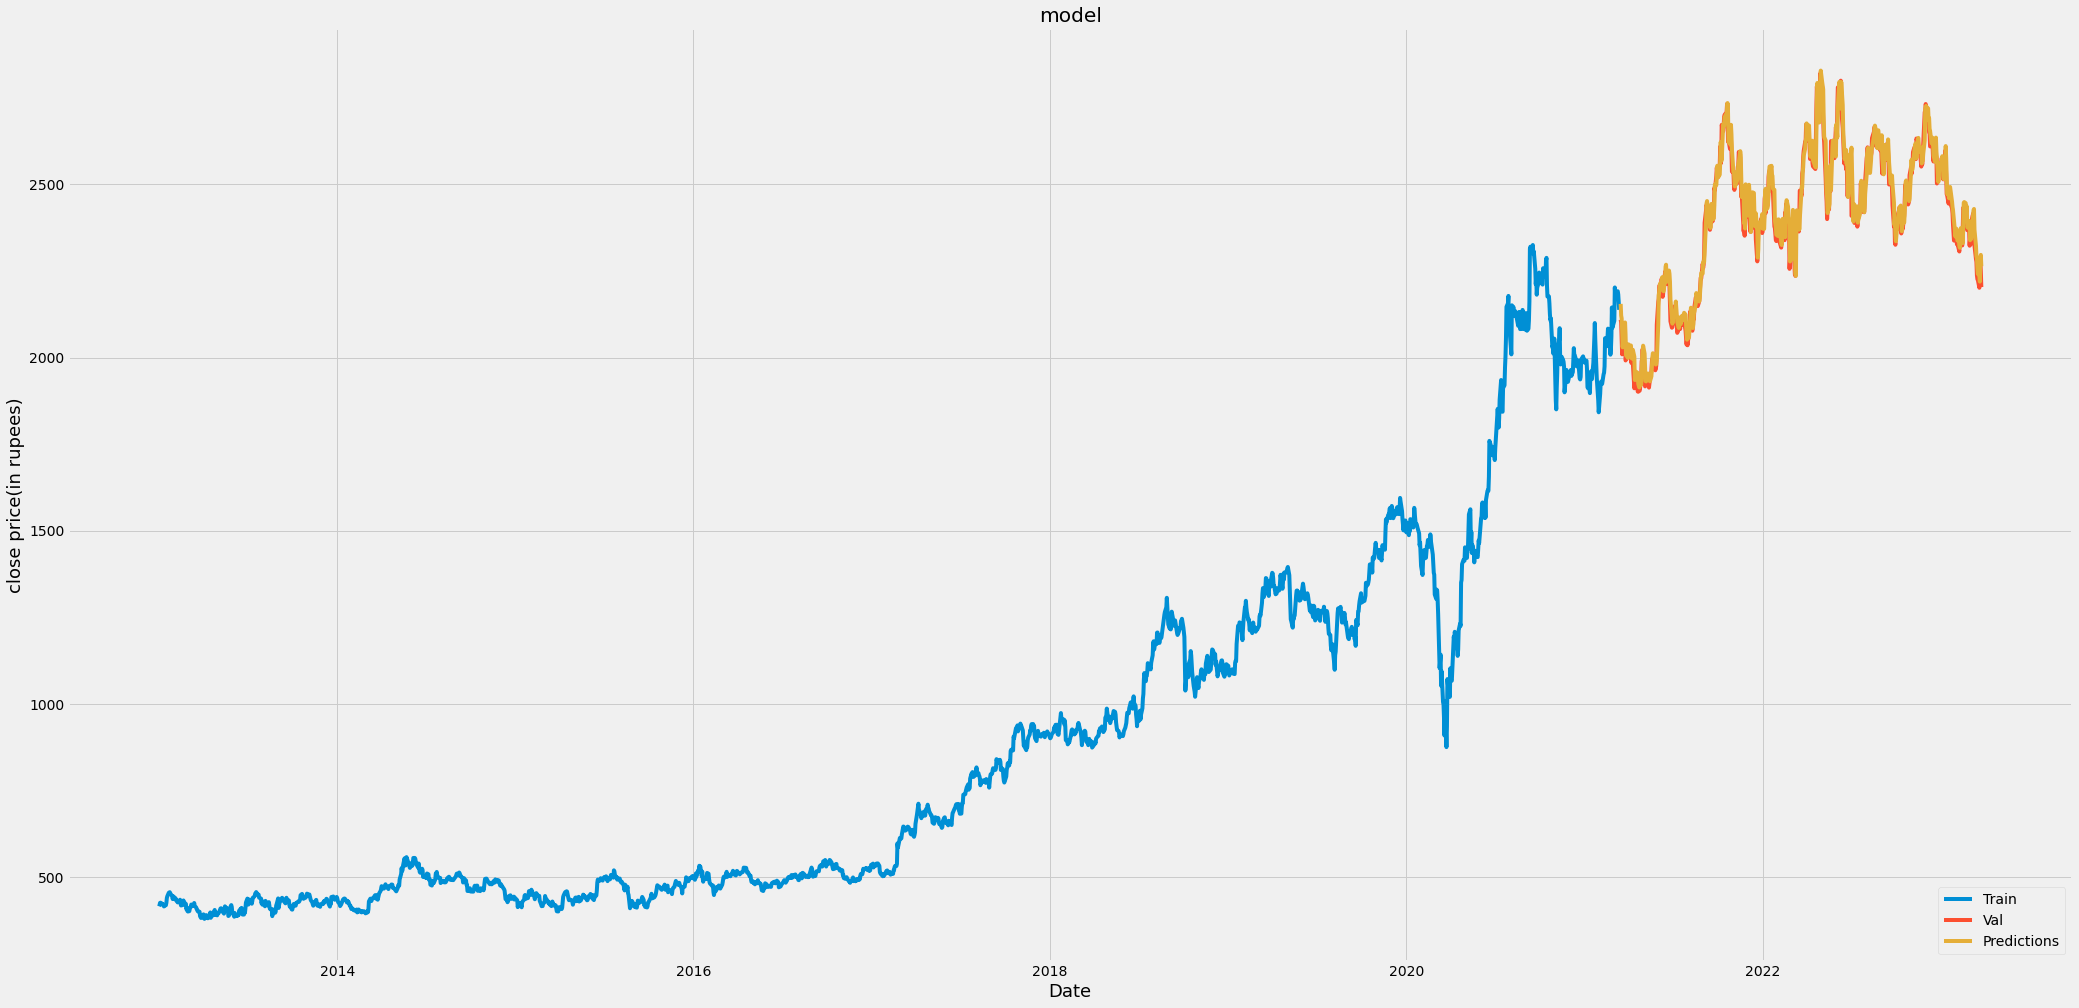

In [62]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(32,16))
plt.title ('model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price(in rupees)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'] , loc='lower right')
plt.show()

In [63]:
!pip install datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 KB 7.5 MB/s eta 0:00:00


In [64]:
# get next day price
from datetime import datetime
end_date = datetime.today().strftime('%Y-%m-%d')

new_info = yf.download(tickers="RELIANCE.NS", start="2013-01-01", end=end_date)
new_df = new_info.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)              

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 37ms/step
[[2211.1643]]


In [65]:
t_info = yf.download(tickers="RELIANCE.NS", start="2023-03-16", end="2023-03-19")
t_info

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-16,2243.00,2254.000000,2202.199951,2225.899902,2225.899902,8474595
2023-03-17,2244.75,2251.949951,2212.699951,2223.100098,2223.100098,15697554
